In [2]:
import os
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
import seaborn as sns

# Unsupervised Learning

In [181]:
from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data["data"], columns=data["feature_names"])
Y = pd.DataFrame(data["target"], columns=["Target"])
#print(data["DESCR"])

In [128]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_ = StandardScaler().fit_transform(X)
pca = PCA(n_components=3)
pca.fit(X_)
loadings = pd.DataFrame(pca.components_.T, columns=["C1","C2","C3"] ,index=data["feature_names"])
print(loadings.sort_values(by="C1",ascending=False))

                         C1        C2        C3
petal length (cm)  0.580413  0.024492  0.142126
petal width (cm)   0.564857  0.066942  0.634273
sepal length (cm)  0.521066  0.377418 -0.719566
sepal width (cm)  -0.269347  0.923296  0.244382


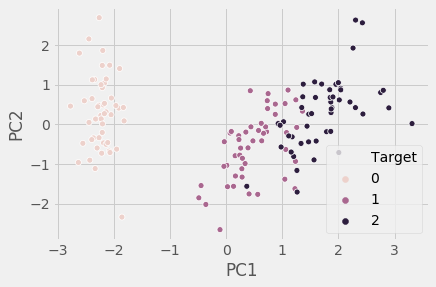

In [130]:
components = pd.DataFrame(pca.fit_transform(X_), columns=["PC1","PC2","PC3"])
components = pd.concat([components,Y], axis="columns")

sns.scatterplot(x="PC1", y="PC2", data=components, hue="Target")

In [133]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762 0.03668922]


## K-Means Clustering

In [238]:
from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data["data"], columns=data["feature_names"])
Y = pd.DataFrame(data["target"], columns=["Target"])

df = pd.concat([X,Y],axis="columns")

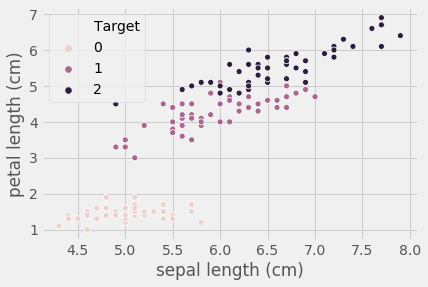

In [239]:
sns.scatterplot(x="sepal length (cm)", y="petal length (cm)", data=df, hue="Target")

Text(0.5, 1.0, 'KMeans')

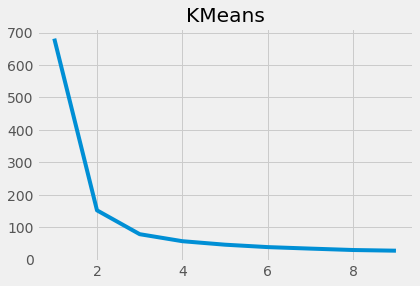

In [240]:
from sklearn.cluster import KMeans, AgglomerativeClustering

K = np.arange(1,10)
scores = []

for k in K:
    clf = KMeans(n_clusters=k, random_state=42)
    clf.fit(X)
    scores.append(clf.inertia_)
    
fig, ax = plt.subplots()
sns.lineplot(K, scores, ax=ax)
ax.set_title("KMeans")

In [241]:
clf = KMeans(n_clusters=3, random_state=42)
clf.fit(X_)
cluster_centers = pd.DataFrame(clf.cluster_centers_, columns=X.columns)
print(cluster_centers)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -1.014579          0.853263          -1.304987         -1.254893
1           1.135970          0.088422           0.996155          1.017526
2          -0.050220         -0.883376           0.347738          0.281527


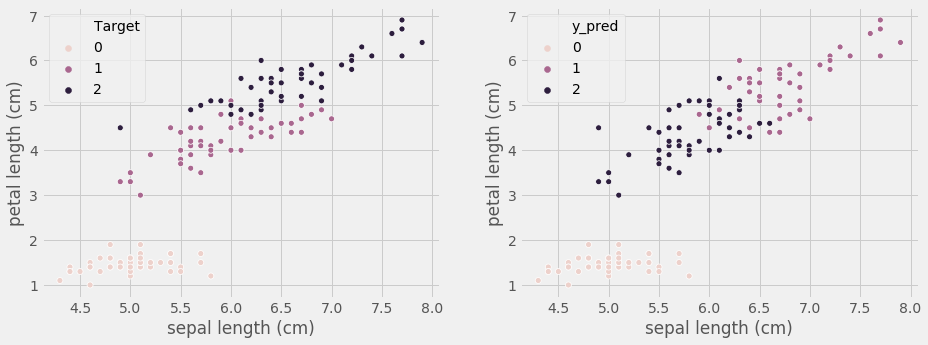

In [243]:
y_pred = pd.DataFrame(clf.predict(X_), columns=["y_pred"])
df_pred = pd.concat([X,y_pred], axis="columns")

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,5))

sns.scatterplot(x="sepal length (cm)",y="petal length (cm)", ax=ax1, data=df, hue="Target")
sns.scatterplot(x="sepal length (cm)",y="petal length (cm)", ax=ax2, data=df_pred, hue="y_pred")

# Agglomerative (Hierachical) Clustering

In [259]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    
    # Children of hierarchical clustering
    children = model.children_
    
    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

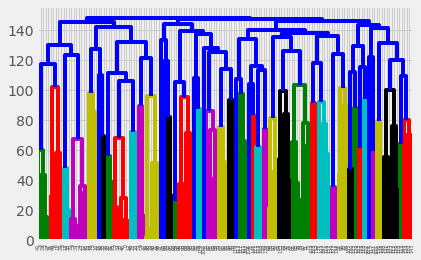

In [263]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
data = load_iris()
X = pd.DataFrame(data["data"], columns=data["feature_names"])
X_ = StandardScaler().fit_transform(X)
Y = pd.DataFrame(data["target"], columns=["Target"])
df = pd.concat([X,Y],axis="columns")

from sklearn.cluster import AgglomerativeClustering

clf = AgglomerativeClustering(n_clusters=3)
clf.fit(X_)

plot_dendrogram(clf)

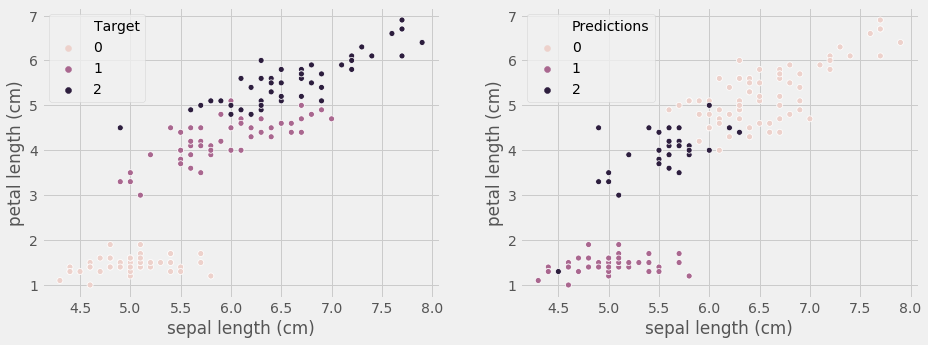

In [268]:
y_pred = clf.fit_predict(X_)
y_pred = pd.DataFrame(y_pred, columns=["Predictions"])
df_pred = pd.concat([X,y_pred], axis="columns")

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,5))

sns.scatterplot(x="sepal length (cm)",y="petal length (cm)", ax=ax1, data=df, hue="Target")
sns.scatterplot(x="sepal length (cm)",y="petal length (cm)", ax=ax2, data=df_pred, hue="Predictions")